# Определение перспективного тарифа для телеком-компании

# Содержание

[Общая информация  и предобработка данных](#Общая-информация-и-предобработка-данных)


* [Таблица со звонками](#Таблица-со-звонками)

* [Таблица с интернетом](#Таблица-с-интернетом)

* [Таблица с сообщениями](#Таблица-с-сообщениями)

* [Таблица с тарифом](#Таблица-с-тарифом)

* [Таблица с пользователями](#Таблица-с-пользователями)


[Группировка данных](#Группировка-данных)

* [Количество звонков и израсходованных минут по месяцам](#Количество-звонков-и-израсходованных-минут-по-месяцам)

* [Количество сообщений по месяцам](#Количество-сообщений-по-месяцам)

* [ Интернет по месяцам](#Интернет-по-месяцам)

* [Помесячная выручка с каждого пользователя](#Помесячная-выручка-с-каждого-пользователя)

[Изучение данных](#Изучение-данных)

[Проверка гипотез](#Проверка-гипотез)

[Общие выводы](#Общие-выводы)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
from datetime import datetime
import seaborn as sns

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

## Общая информация  и предобработка данных


### Таблица со звонками<a class="anchor" id="first-bullet"></a>


In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d") # приводим к нужному типу данных

In [7]:
calls['duration'] = np.ceil(calls['duration']).astype('int') # в соответствии с политикой оператора округляем все звонки

In [8]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


#### Выводы
 - столбец call_date приведен к формату даты
 - данные в столбце duration приведены к типу int и округлены в большую сторону
 - звонки, длительностью 0 оставлены без изменений, так как это пропущенные

### Таблица с интернетом

In [9]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [10]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [11]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [12]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")

In [13]:
internet.pop('Unnamed: 0')

0              0
1              1
2              2
3              3
4              4
           ...  
149391    149391
149392    149392
149393    149393
149394    149394
149395    149395
Name: Unnamed: 0, Length: 149396, dtype: int64

#### Выводы
- столбец session_date приведен к формату даты
- удаляем столбец Unnamed: 0, так как он не содержит полезной информации

### Таблица с сообщениями

In [14]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [15]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [16]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [17]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")


#### Выводы
- столбец message_date приведен к типу даты

### Таблица с тарифом

In [18]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [19]:
tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


In [20]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [21]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})


#### Выводы
- С этой таблицей все хорошо. Переименовываю только колонку с названием тарифа

### Таблица с пользователями

In [22]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [23]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [24]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [25]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")

In [26]:
users['churn_date'].fillna(0)

0                        0
1                        0
2                        0
3                        0
4                        0
              ...         
495                      0
496                      0
497                      0
498    2018-10-25 00:00:00
499                      0
Name: churn_date, Length: 500, dtype: object

#### Выводы
- столбцы churn_date и reg_date приведены к нужному типу данных 
- отсутствующие значения в столбце churn_date заменены на 0 

## Группировка данных

### Количество звонков и израсходованных минут по месяцам

In [27]:
calls['month'] = calls['call_date'].dt.month # оставляем только месяц

In [28]:
calls_in_month = calls.groupby(['user_id', 'month']).agg({'duration':'sum', 'id':'count'}).reset_index() # группировка 


In [29]:
# замена наименований столбцов
calls_in_month.columns = ['user_id', 'month', 'calls_duration_month', 'calls_count_month']

In [30]:
calls_in_month.head()

,user_id,month,calls_duration_month,calls_count_month
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58


### Количество сообщений по месяцам

In [31]:
messages['month'] = messages['message_date'].dt.month 

In [32]:
#группировка по месяцам 
messages_in_month = messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index()


In [33]:
messages_in_month = messages_in_month.rename(columns={'id': 'message_count'})
messages_in_month.head()

,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


### Интернет по месяцам

In [34]:
internet['month'] = internet['session_date'].dt.month

In [35]:
internet_month = internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'})#.reset_index()


In [36]:
internet_month = internet_month.rename(columns={'mb_used': 'mb_used_month'})

In [37]:
# добавления столбца с исползованным интернетом в Гб
internet_month['gb_used_month'] = np.ceil(internet_month['mb_used_month'] / 1024) 

In [38]:
internet_month.head()

mb_used_month  gb_used_month
user_id month                              
1000    5            2253.49            3.0
        6           23233.77           23.0
        7           14003.64           14.0
        8           14055.93           14.0
        9           14568.91           15.0

### Помесячная выручка с каждого пользователя

#### Объединение таблиц 

In [39]:
data = calls_in_month.merge(internet_month, on=['user_id', 'month'], how='outer') #объединяем звонки и интернет
data = data.merge(messages_in_month, on=['user_id', 'month'], how='outer') # добавляем сообщения
data = data.merge(users[['user_id', 'city', 'tariff']], on='user_id', how='left') # данные пользователей
data = data.merge(tariffs, on='tariff', how='left') # условий тарифов

data.head()

,user_id,month,calls_duration_month,calls_count_month,mb_used_month,gb_used_month,message_count,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,2253.49,3.0,22.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,43.0,23233.77,23.0,60.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,47.0,14003.64,14.0,75.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,52.0,14055.93,14.0,81.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,58.0,14568.91,15.0,57.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1


In [40]:
data.isna().sum()

user_id                    0
month                      0
calls_duration_month      40
calls_count_month         40
mb_used_month             11
gb_used_month             11
message_count            497
city                       0
tariff                     0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

In [41]:
# заполняем пропуски нулями
data['mb_used_month'] = data['mb_used_month'].fillna(0)
data['gb_used_month'] = data['gb_used_month'].fillna(0)
data['message_count'] = data['message_count'].fillna(0)


#### Вычисление сумм, уплаченных пользователями сверх тарифов

In [42]:
def income_month(used, included, above):
    '''позволяет вычислить количество израсходованных минут, сообщений и интернета сверх тарифа и их стоимость '''
    income = 0
    if used > included:
        income = (used - included) * above
        return income
    return income


In [43]:
income_calls = data.apply(lambda row: income_month(row['calls_duration_month'], # вычисление стоимости дополнительных минут 
                                                   row['minutes_included'], 
                                                   row['rub_per_minute']), axis=1)


In [44]:
income_messages = data.apply(lambda row: income_month(row['message_count'], # вычисление стоимости дополнительных сообщений
                                                      row['messages_included'], 
                                                      row['rub_per_message']), axis=1)


In [45]:
income_internet = data.apply(lambda row: income_month(row['gb_used_month'], # вычисление стоимости дополнительного 
                                                     (row['mb_per_month_included'] / 1024), #   трафика интернета 
                                                      row['rub_per_gb']), axis=1)


In [46]:
#добавление столбца с суммой ежемесячной оплаты использованных услуг связи
data['income'] = income_internet + income_messages + income_calls + data['rub_monthly_fee'] 
data.head(15)

,user_id,month,calls_duration_month,calls_count_month,mb_used_month,gb_used_month,message_count,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,income
0,1000,5,159.0,22.0,2253.49,3.0,22.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,172.0,43.0,23233.77,23.0,60.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,340.0,47.0,14003.64,14.0,75.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,408.0,52.0,14055.93,14.0,81.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,466.0,58.0,14568.91,15.0,57.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
5,1000,10,350.0,57.0,14702.49,15.0,73.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
6,1000,11,338.0,43.0,14756.47,15.0,58.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
7,1000,12,333.0,46.0,9817.61,10.0,70.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
8,1001,11,430.0,59.0,18429.34,18.0,0.0,Москва,smart,50,15360,500,550,200,3,3,1150.0
9,1001,12,414.0,63.0,14036.66,14.0,0.0,Москва,smart,50,15360,500,550,200,3,3,550.0


### Выводы
 - Сгруппированы данные по длительности звонков, количеству сообщений и использованных Гб интернета по месяцам в разрезе пользователей
 - Сгруппированные данные объединены в таблицу
 - В полученной таблице отсутсвующие данные заполнены 0, так как это неиспользованные остатки от тарифов
 - Расчитана ежемесячная сумма оплаты пользователем за услуги связи, включающая стоимость дополнительно использованных минут и интернета и абонентской платы 


## Изучение данных

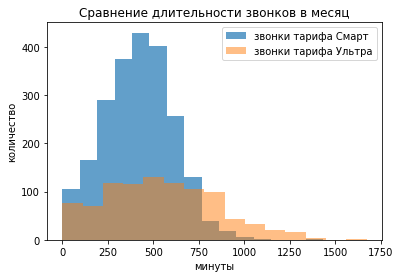

In [47]:
plt.hist(data[data['tariff'] == 'smart']['calls_duration_month'], label='звонки тарифа Смарт', bins=15, alpha=0.7) # выбраны данные по звонкам тарифа смарт
plt.hist(data[data['tariff'] == 'ultra']['calls_duration_month'], label='звонки тарифа Ультра', bins=15, alpha=0.5) # выбраны данные по звонкам тарифа ультра
plt.title('Сравнение длительности звонков в месяц')
plt.xlabel('минуты')
plt.ylabel('количество')
plt.legend()
plt.show()

По графику видно, что пользователи тарифа смарт, имеющие 500 минут ежемесячно, чаще всего превышают лимит в среднем на 100-250 минут.
Пользователи тарифа ультра не выговаривают положенные им 3000 минут.

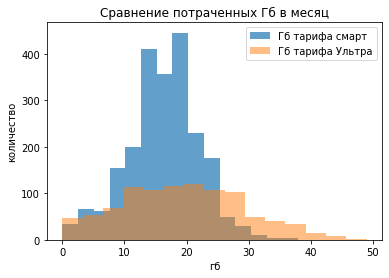

In [48]:
plt.hist(data[data['tariff'] == 'smart']['gb_used_month'], bins=15, label='Гб тарифа смарт', alpha=0.7) #данные по использованным Гб тарифа смарт
plt.hist(data[data['tariff'] == 'ultra']['gb_used_month'], bins=15, label='Гб тарифа Ультра', alpha=0.5) #данные по использованным Гб тарифа ультра
plt.title('Сравнение потраченных Гб в месяц')
plt.xlabel('гб')
plt.ylabel('количество')
plt.legend()
plt.show()

Пользователи тарифа смарт опять же сильно превышают лимит в 15 Гб. Пик использования приходится на 18-20 Гб.
А обладатели тарифа ультра в основном используют от 10 до 30 Гб ежемесячно. Первышения лимита по интернету незначительно.

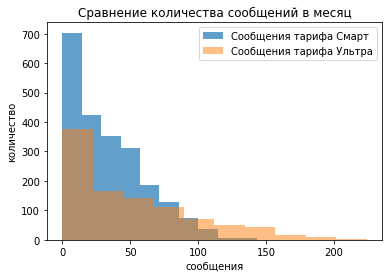

In [49]:
plt.hist(data[data['tariff'] == 'smart']['message_count'], label='Сообщения тарифа Смарт', bins=10, alpha=0.7) # данные по сообщениям тарифа смарт
plt.hist(data[data['tariff'] == 'ultra']['message_count'], label='Сообщения тарифа Ультра', bins=10, alpha=0.5) # данные по сообщениям тарифа ультра
plt.title('Сравнение количества сообщений в месяц')
plt.xlabel('сообщения')
plt.ylabel('количество')
plt.legend()
plt.show()

Пользователи тарифа смарт имеют лимит сообщений в 50 шт ежемесячно. Большинство пользователей ограничивается 10 сообщениями. Но некоторым лимита не хватает.
Пользователи тарифа ультра имеют лимит в 1000 сообщений. И ни один пользователь даже половину лимита не использовал. Пик также приходится на 10-15 сообщений.

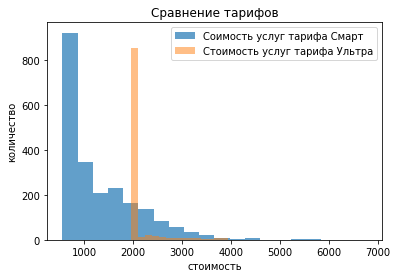

In [50]:
plt.hist(data[data['tariff'] == 'smart']['income'], bins=20, label='Соимость услуг тарифа Смарт', alpha=0.7) # данные по сообщениям тарифа смарт
plt.hist(data[data['tariff'] == 'ultra']['income'], bins=20, label='Стоимость услуг тарифа Ультра', alpha=0.5) # данные по сообщениям тарифа ультра
plt.title('Сравнение тарифов')
plt.xlabel('стоимость')
plt.ylabel('количество')
plt.legend()
plt.show()

Пользователи тарифа смарт при абонетской плате в 550 руб. значительно превышают ежемесячный платеж. Но основная часть абонентов стараются придерживаться лимитов.
У пользователей тарифа ультра все более менее в пределах 2000, при абонентской плате в 1950 руб.

In [51]:
data_grouped = data.groupby('tariff').agg({'income': ['mean', 'var', 'std']}).style.format("{:.2f}")                                    

In [52]:
display(data_grouped)

У пользователей смарта средняя ежесямесячная сумма - 1290 руб. Это неоправданно выше тарифа. Дисперсия равна 670 957 - это очень большой разброс в данных.
Пользователи тарифа ультра в среднем укладываются в стоимость тарифа. Но разброс данных тоже имеется.

### Выводы
Пользователи тарифа смарт чаще и больше платят свех тарифа. В основном перерасход в звонках и интернете.
Пользователи тарифа ультра в целом придерживаются тарифа

## Проверка гипотез

Н0: средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются
Н1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Cравниваемые выборки независимы между собой. 
Проверяем гипотезы о равенстве среднего для двух генеральных совокупностей по выборкам.

In [53]:
smart = data[data['tariff'] == 'smart']
ultra = data[data['tariff'] == 'ultra']


In [54]:
result = st.ttest_ind(smart['income'], ultra['income'])
alpha = 0.05
print('р-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Нулевую гипотезу отвергаем')
else:
    print('Не можем отвергнуть нулевую гипотезу')

р-значение: 1.4229814360764067e-160
Нулевую гипотезу отвергаем


Таким образом, получается, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Н0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.
Н1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [55]:
# делим данные на Москву и другие регионы.
data['region'] = np.where(data['city'] == 'Москва', 'Москва','Другие регионы')

In [56]:
msk = data[data['region'] == 'Москва']
other_region = data[data['region'] == 'Другие регионы']

In [57]:
result = st.ttest_ind(msk['income'], other_region['income'])
alpha = 0.05
print('р-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Нулевую гипотезу отвергаем')
else:
    print('Не можем отвергнуть нулевую гипотезу')


р-значение: 0.5440152911670224
Не можем отвергнуть нулевую гипотезу


средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

## Общие выводы
- исходные таблицы изучены, данные в столбцах приведены к нужным типам данных и округлены в большую сторону, как требует того тарифные условия
-  Сгруппированы данные по длительности звонков, количеству сообщений и использованных Гб интернета по месяцам в разрезе пользователей
- Сгруппированные данные объединены в таблицу
- В полученной таблице отсутсвующие данные заполнены 0, так как это неиспользованные остатки от тарифов
- Расчитана ежемесячная сумма оплаты пользователем за услуги связи, включающая стоимость дополнительно использованных минут и интернета и абонентской платы 
- произведено сравнение поведения пользователей разных тарифов
- пользователи тарифа смарт превышают лимит по звонкам в среднем на 100-250 минут, а пользователи тарифа ультра не выговаривают положенные им 3000 минут.
- Пользователи тарифа смарт опять же сильно превышают лимит в 15 Гб. Пик использования приходится на 18-20 Гб.
А обладатели тарифа ультра в основном используют от 10 до 30 Гб ежемесячно. Первышения лимита по интернету незначительно.
- данные по сообщениям незначительны и на общую картину не влияют.
- Cравниваемые выборки независимы между собой. Проверяем гипотезы о равенстве среднего для двух генеральных совокупностей по выборкам.
- Нулевую гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются, отвергаем.
- А нулевая гипотеза о том, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, отвергнуть не получилось.